In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../../data/FimaNfipClaims.csv')
pd.set_option('display.max_columns', None)

In [3]:
print(df.shape)

(2570089, 40)


In [4]:
#some date analysis
print( df.dateOfLoss.min()) 
print( df.dateOfLoss.max()) 


1970-08-31T00:00:00.000Z
2022-04-14T00:00:00.000Z


In [5]:
df.head(3)

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2021-07-24T00:00:00.000Z,NaN,1.0,Temporarily Unavailable,N,1.0,24033.0,5.0,2007-01-01T00:00:00.000Z,0.0,NaN,NaN,2.403380e+10,X,0.0,38.8,-77.0,0,NaN,0.0,3.0,0.0,NaN,1.0,1953-01-01T00:00:00.000Z,2006-11-15T00:00:00.000Z,NaN,NaN,NaN,0.0,7,0.0,MD,100000.0,40000.0,2007,20745.0,1.0,babe8abc-eae6-49f4-a5d6-b892b1087a45
1,0.0,2021-07-24T00:00:00.000Z,NaN,NaN,Temporarily Unavailable,N,1.0,30009.0,NaN,2011-07-12T00:00:00.000Z,1.0,NaN,NaN,3.000900e+10,AE,0.0,45.2,-109.2,0,NaN,0.0,2.0,0.0,50.0,1.0,1975-01-01T00:00:00.000Z,2011-04-13T00:00:00.000Z,593.5,NaN,NaN,0.0,1,0.0,MT,150000.0,0.0,2011,59068.0,1.0,dbc2a6cc-192f-47ee-bd3c-e76bcc6a2350
2,0.0,2021-11-20T00:00:00.000Z,50.0,NaN,Temporarily Unavailable,N,1.0,48201.0,5.0,2001-06-09T00:00:00.000Z,0.0,3.0,0.0,4.820141e+10,AE,0.0,29.7,-95.4,0,49.5,50.0,2.0,0.0,10.0,1.0,1983-01-01T00:00:00.000Z,1999-06-16T00:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,TX,25000.0,25000.0,2001,77025.0,1.0,547d731b-b35f-4d60-a903-15cc8a4d12df


In [6]:
# df[['latitude','longitude']]

In [7]:
#see which years have data: 
agg= df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'})
print(agg.head(10))
#crop to after 1975 
df = df.loc[df['yearOfLoss']>=1975]

            amountPaidOnBuildingClaim
yearOfLoss                           
1970                                0
1972                                0
1973                                3
1974                                4
1975                               20
1976                               36
1977                             3503
1978                            25352
1979                            61512
1980                            36459


In [8]:
#print the rows with na claim amount 
print(df.shape[0])
print('pct rows of claim amount' ,
      (df.shape[0] - df.dropna(subset=['amountPaidOnBuildingClaim']).shape[0])/df.shape[0])

#drop rows with empty claim amount 
df = df.dropna(subset=['amountPaidOnBuildingClaim']) 

2570065
pct rows of claim amount 0.2591498658594238


In [9]:
#see which states have data 
agg= df.groupby('state').agg({'amountPaidOnBuildingClaim':'count'}).sort_values(by='amountPaidOnBuildingClaim')
print(agg.head(10))

#crop states that do not have a lot of data 
df = df.loc[~df['state'].isin(['MP','AS','GU','DC',np.nan])]


       amountPaidOnBuildingClaim
state                           
MP                             3
AS                            13
GU                            94
DC                           277
WY                           293
AK                           473
UT                           607
ID                           729
NM                           830
NV                          1183


In [10]:
#why are there 53 states? 
print('number of states', len(df.state.unique()))
print('all states',df.state.unique())

number of states 53
all states ['MT' 'MD' 'SC' 'VA' 'FL' 'TX' 'MI' 'NJ' 'IL' 'AZ' 'MO' 'PA' 'LA' 'NY'
 'NC' 'CT' 'GA' 'CA' 'MS' 'DE' 'MN' 'AL' 'KS' 'OH' 'AR' 'WV' 'WA' 'OK'
 'SD' 'IA' 'ID' 'TN' 'MA' 'KY' 'IN' 'WI' 'CO' 'NE' 'OR' 'ND' 'RI' 'NV'
 'NM' 'NH' 'VT' 'ME' 'UN' 'VI' 'HI' 'WY' 'PR' 'UT' 'AK']


Text(0.5, 1.0, 'claims amt')

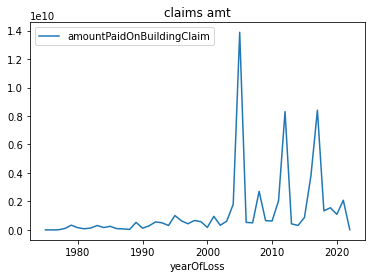

In [11]:
#amount paid by year 
df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'sum'}).plot()
plt.title('claims amt')

Text(0.5, 1.0, 'claims count')

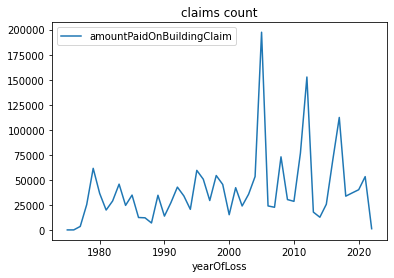

In [12]:
#number of claims by year 
df.groupby('yearOfLoss').agg({'amountPaidOnBuildingClaim':'count'}).plot()
plt.title('claims count')

Text(0.5, 1.0, 'totale claim amt by state')

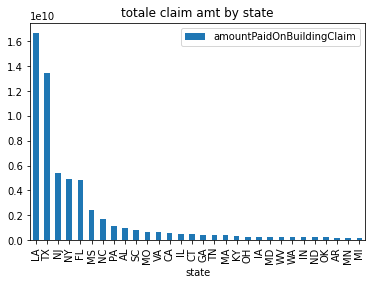

In [13]:
#number of claims by state 
agg= df.groupby('state').agg({'amountPaidOnBuildingClaim':'sum'})
agg.sort_values(by='amountPaidOnBuildingClaim', ascending=False).head(30).plot(kind='bar')
plt.title('totale claim amt by state')

In [14]:
#group by state and year
agg= df.groupby(['state','yearOfLoss']).agg({'amountPaidOnBuildingClaim':'sum'})
print(agg.shape)
agg.describe()

(2381, 1)


,amountPaidOnBuildingClaim
count,2.381000e+03
mean,2.537427e+07
std,2.992583e+08
min,0.000000e+00
25%,1.111403e+05
50%,7.522730e+05
75%,4.293330e+06
max,1.079989e+10


In [15]:
# #see which year and state surpassed 90% threshold
# thres = agg.quantile(0.99).iloc[0]
# print('99% threshold value is',thres)
# agg1 = agg.loc[agg['amountPaidOnBuildingClaim']>thres]
# print(agg1.head(5))
# #see which state have the most incidents passing 90% thres
# agg1.reset_index().groupby('state').agg('count').sort_values(by='yearOfLoss', ascending=False).head(5)

In [16]:
#construct index 
state_ls = df.state.unique()
print('number of states', len(state_ls))
year_id = np.arange(1975, 2021, 1) 
idd = pd.MultiIndex.from_product([state_ls, year_id],
                           names=['state', 'year'])
#length should be |years| * |grid_ids| 
print('len of idd', len(idd))
#get dataframe 
idd = idd.to_frame().reset_index(drop=True)
idd.head(2)

number of states 53
len of idd 2438


,state,year
0,MT,1975
1,MT,1976


In [17]:
# state and year that loss amount surpasses 90% threshold 
#group by state and year
agg= df.groupby(['state','yearOfLoss']).agg({'amountPaidOnBuildingClaim':'sum'})
#see which year and state surpassed 99% threshold
thres = agg.quantile(0.99).iloc[0]
print('X% threshold value is',thres)
agg1 = agg.loc[agg['amountPaidOnBuildingClaim']>thres].reset_index()
target = agg1.drop('amountPaidOnBuildingClaim', axis=1)
target = target.rename(columns={'yearOfLoss':'target_year'})
print('total incidents', len(target))
target

X% threshold value is 321903271.2039973
total incidents 24


,state,target_year
0,FL,1995
1,FL,2004
2,FL,2005
3,FL,2017
4,FL,2020
5,LA,1995
6,LA,2005
7,LA,2008
8,LA,2012
9,LA,2016


In [18]:
#construct Y: 
#loop over target to fill idd 
#target = 1 if there is a major flood in the next 1-5 years (current year not included)
""" 
#input: idd, 
#target: dataframe indicating the state and years passing threashold 
n_period: for next 1 - n years, from current year, if there will be a major flood hitting state 
""" 

def construct_y(idd , target , n_pred:int) : 

    y_df = idd.copy()
    y_df['target']=0 

    #remove the last n years since we don't know the target 
    y_df = y_df.loc[y_df['year']<= 2022 - n_pred]

    for i, row in target.iterrows():
        year = row['target_year']
        state = row['state']
        #for that state, if there is a major flood in the next 5 years (current year major flood doesn't count)
        y_df.loc[(idd['state']==state) 
            &((year - idd['year']) <= n_pred) & ((year-idd['year'])>=1), 'target']=1 
    return y_df 

y_df = construct_y(idd, target, 5)
print(y_df.head(5))
print(y_df.target.sum())


  state  year  target
0    MT  1975       0
1    MT  1976       0
2    MT  1977       0
3    MT  1978       0
4    MT  1979       0
82


In [19]:
#get annual flood claim amount, and fit to idd (state list by year list)
#with interpolating missing values 
def aggregate_yrly(df, idd): 
    #aggregate annual flood loss
    agg= df.groupby(['state','yearOfLoss']).agg({'amountPaidOnBuildingClaim':'sum'})
    agg = agg.reset_index()
    agg = agg.rename(columns={'amountPaidOnBuildingClaim':'loss','yearOfLoss':'year'})
    #set agg index to be idd 
    agg = pd.merge(idd, agg, on=['state','year'], how='left')

    #fillna with interpolation within each state 
    agg = agg.groupby('state').apply(lambda group: group.interpolate(method='linear'))
    #then fillna with ffill and bfill 
    agg = agg.groupby('state').apply(lambda group: group.ffill().bfill())
    return agg 

In [20]:
#construct X baseline: using the current and past N years of claim amount 
def construct_x_base(idd, n_past: int): 
    x_df = idd.copy()
    
    #call function to get aggregated annual loss 
    agg = aggregate_yrly(df, idd) 
    
    agg_all = agg.copy()
    #add previous year loss by shifting and appending 
    for n in range(1, n_past):
        agg1 = agg.copy()
        agg1['year'] = agg1['year'] + n
        agg1 = agg1.rename(columns={'loss':'loss-'+str(n)})
        agg_all = pd.merge(agg_all, agg1, how='left', on = ['state','year'])
    
    #realign index to get x_df 
    x_df = pd.merge(idd, agg_all, on=['state','year'], how='left')
    
    #finally forward fill and backward fill for years without data 
    x_df = x_df.ffill().bfill()
    
    return x_df  

In [21]:
x_df = construct_x_base(idd, 5)

<ipython-input-19-94af852760a8>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  agg = agg.groupby('state').apply(lambda group: group.interpolate(method='linear'))
<ipython-input-19-94af852760a8>:14: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  agg = agg.groupby('state').apply(lambda group: gr

## Try ML

In [129]:
import warnings
warnings.filterwarnings("ignore")

# pwd
import sys
# setting path
sys.path.append('../../src')

#import model training module 
import models as m 

#split training and testing 
from sklearn.model_selection import train_test_split
# import shap
from sklearn import metrics


In [130]:
#construct x, y 
x_df = construct_x_base(idd, n_past=5)
y_df = construct_y(idd, target, n_pred=5)

#check shapes of x, y df: y_df may be smaller 
print(y_df.shape, x_df.shape)

(2279, 3) (2438, 7)


In [61]:
#align x, y_df: 
y_df.set_index(['state','year'])
x_df.set_index(['state','year'])

xy_df = pd.merge(x_df, y_df, on=['state','year'], how='inner')
print(xy_df.shape)

#fillna: 
xy_df = xy_df.fillna(0)

(2279, 8)


In [64]:
#add one hot for state variable 
# Get one hot encoding of columns B
one_hot = pd.get_dummies(xy_df['state'])
# Drop column B as it is now encoded
# xy_df = xy_df.drop('state',axis = 1)
# Join the encoded df
xy_df = xy_df.join(one_hot)

In [65]:
#training years: 1975 - 2011, testing years: 2012-2021 
xy_df_train = xy_df.loc[xy_df['year']<=2011]
xy_df_test = xy_df.loc[xy_df['year'] > 2011]

In [66]:
x_train = xy_df_train.drop(['target','state'], axis=1)#drop target col, and state col (one-hot encode)
x_test = xy_df_test.drop(['target','state'], axis=1)#drop target col 

y_train = xy_df_train['target']
y_test = xy_df_test['target']


In [67]:
#positive cases are more in the recent 10 years than before 

print('imbalance over all', xy_df.filter(regex='target').sum()/len(xy_df))
print('imbalance train', xy_df_train.filter(regex='target').sum()/len(xy_df_train))
print('imbalance test', xy_df_test.filter(regex='target').sum()/len(xy_df_test))


imbalance over all target    0.035981
dtype: float64
imbalance train target    0.029067
dtype: float64
imbalance test target    0.078616
dtype: float64


In [68]:
results={}

In [69]:
#logreg model 
y_pred, y_pred_prob = m.run_logreg(x_train, y_train, x_test)
results['logreg'] = m.get_scores_clf(y_test, y_pred_prob)
#xgb model 
y_pred, y_pred_prob = m.run_xgb(x_train, y_train, x_test)
results['xgb'] = m.get_scores_clf(y_test, y_pred_prob)

running log reg...


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:760: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:123: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:128: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_param

/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: Fi

Train AUC:  0.9483727701606959
maximum f1 score, thres 0.7370776906628653 0.7
auc, f1, accu, accu_bl, precision, recall=  0.9215017064846416 0.7370776906628653 0.9088050314465409 0.7858703071672355 0.31274633123689727 0.64
[[273  20]
 [  9  16]]
running xgb...


/usr/local/lib/python3.9/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-package

/usr/local/lib/python3.9/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/usr/local/lib/python3.9/site-package

Train AUC:  1.0
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.7705627705627704 0.6
auc, f1, accu, accu_bl, precision, recall=  0.9561774744027304 0.7678134261048833 0.9433962264150944 0.7314675767918088 0.37970403255641877 0.48
[[288   5]
 [ 13  12]]


/usr/local/lib/python3.9/site-packages/xgboost/data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [70]:
results = pd.DataFrame(results)
results.index = ['auc', 'f1', 'accu', 'accu_bl', 'precision', 'recall']
results

,logreg,xgb
auc,0.921502,0.956177
f1,0.737078,0.770563
accu,0.908805,0.943396
accu_bl,0.785870,0.731468
precision,0.312746,0.379704
recall,0.640000,0.480000


In [71]:
#check which states have the highest risk 

In [72]:
xy_df_test

,state,year,loss,loss-1,loss-2,loss-3,loss-4,target,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UN,UT,VA,VI,VT,WA,WI,WV,WY
37,MT,2012,50220.13,4045101.12,17574.83,14037.61,123410.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,MT,2013,126209.98,50220.13,4045101.12,17574.83,14037.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39,MT,2014,434790.18,126209.98,50220.13,4045101.12,17574.83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40,MT,2015,23373.12,434790.18,126209.98,50220.13,4045101.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,MT,2016,70137.93,23373.12,434790.18,126209.98,50220.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,AK,2013,2968448.02,822325.44,94048.98,13411.25,313432.69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2275,AK,2014,346894.09,2968448.02,822325.44,94048.98,13411.25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2276,AK,2015,73232.37,346894.09,2968448.02,822325.44,94048.98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2277,AK,2016,40819.31,73232.37,346894.09,2968448.02,822325.44,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
#reconstruct prediction state and year index 
df1 = xy_df_test[['state','year']]
df1['predict_proba'] = y_pred_prob
df1['actual'] = y_test

# look at which states actually have one, and prediction results 
df1.loc[df1['actual']==1].head(3)

<ipython-input-102-b128a2d6a2c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['predict_proba'] = y_pred_prob
<ipython-input-102-b128a2d6a2c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['actual'] = y_test


,state,year,predict_proba,actual
209,FL,2012,0.798652,1
210,FL,2013,0.837126,1
211,FL,2014,0.633573,1


In [103]:
#look at highest risk state and years with actual result 
df1.sort_values(by='predict_proba', ascending=False).head(10)

,state,year,predict_proba,actual
553,LA,2012,0.985554,1
556,LA,2015,0.982613,1
558,LA,2017,0.979806,1
555,LA,2014,0.978117,1
557,LA,2016,0.946409,1
554,LA,2013,0.912395,1
598,NY,2014,0.867409,0
210,FL,2013,0.837126,1
213,FL,2016,0.831578,1
340,NJ,2014,0.822671,0


In [104]:
#ML prediction highest risk states vs. actual risks: mean of target 0/1 between 2012 - 2017 
df1.groupby(['state']).agg('mean').sort_values(by='predict_proba').tail(10)

,year,predict_proba,actual
state,,,
NC,2014.5,0.066825,0.833333
SC,2014.5,0.084160,0.000000
TN,2014.5,0.098321,0.000000
VA,2014.5,0.105234,0.000000
TX,2014.5,0.395956,1.000000
NJ,2014.5,0.416685,0.333333
MS,2014.5,0.428409,0.000000
NY,2014.5,0.487245,0.000000
FL,2014.5,0.651505,1.000000


## Get results for optimization model

In [153]:
#to do: 
""" wrap function all together to prepare for optimization model inputes:
input = n_pred, n_past, thres 
output = predicted risks for all the states at all years using XGBoost model 
""" 
# def wrap_function():
#     return 

thres_pct = 0.99
n_pred = 10
n_past = 5 


In [154]:
#construct index 
state_ls = df.state.unique()
print('number of states', len(state_ls))
year_id = np.arange(1975, 2021, 1) 
idd = pd.MultiIndex.from_product([state_ls, year_id],
                           names=['state', 'year'])
#length should be |years| * |grid_ids| 
print('len of idd', len(idd))
#get dataframe 
idd = idd.to_frame().reset_index(drop=True)

number of states 53
len of idd 2438


In [155]:
#construct target based on threshold 
#state and year that loss amount surpasses 90% threshold 
#group by state and year
agg= df.groupby(['state','yearOfLoss']).agg({'amountPaidOnBuildingClaim':'sum'})
#see which year and state surpassed 99% threshold
thres = agg.quantile(thres_pct).iloc[0].round()
print(f'{thres_pct} threshold value is {thres}')
agg1 = agg.loc[agg['amountPaidOnBuildingClaim']>thres].reset_index()
target = agg1.drop('amountPaidOnBuildingClaim', axis=1)
target = target.rename(columns={'yearOfLoss':'target_year'})
print(f'total incidents {len(target)}')

0.99 threshold value is 321903271.0
total incidents 24


In [156]:
#construct x, y 
x_df = construct_x_base(idd, n_past=5)
y_df = construct_y(idd, target, n_pred=5)

#align x, y_df: 
y_df.set_index(['state','year'])
x_df.set_index(['state','year'])

xy_df = pd.merge(x_df, y_df, on=['state','year'], how='inner')
print(xy_df.shape)

#fillna: 
xy_df = xy_df.fillna(0)

# Get one hot encoding for state variable 
one_hot = pd.get_dummies(xy_df['state'])
# Join the encoded df
xy_df = xy_df.join(one_hot)

#training years: 1975 - 2011, testing years: 2012-2021 
xy_df_train = xy_df.loc[xy_df['year']<=2011]
xy_df_test = xy_df.loc[xy_df['year'] > 2011]

#drop non numeric variables 
x_train = xy_df_train.drop(['target','state'], axis=1)#drop target col, and state col (one-hot encode)
x_test = xy_df_test.drop(['target','state'], axis=1)#drop target col 
y_train = xy_df_train['target']
y_test = xy_df_test['target']

#train and run xgb model
y_pred, y_pred_prob = m.run_xgb(x_train, y_train, x_test)
m.get_scores_clf(y_test, y_pred_prob)

(2279, 8)
running xgb...
Train AUC:  1.0
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 10}
maximum f1 score, thres 0.7705627705627704 0.6
auc, f1, accu, accu_bl, precision, recall=  0.9561774744027304 0.7678134261048833 0.9433962264150944 0.7314675767918088 0.37970403255641877 0.48
[[288   5]
 [ 13  12]]


(0.9561774744027304,
 0.7705627705627704,
 0.9433962264150944,
 0.7314675767918088,
 0.37970403255641877,
 0.48)

In [157]:
#reconstruct prediction state and year index 
df1 = xy_df_test[['state','year']]
df1['predict_proba'] = y_pred_prob
df1['actual'] = y_test

In [158]:
#output prediction results from xgb model: 
#df1.to_csv('ml_base_'+ str(thres_pct) + '_' + str(n_pred) +'.csv')